In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
#from warnings import simplefilter


# Best on Data Rendundancy
# https://cmdlinetips.com/2019/09/how-to-drop-duplicate-rows-in-pandas/

# Logistic Regression Using Model


In [0]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sb
%matplotlib inline


## The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.


In [0]:
titanic =pd.read_csv( 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/titanic.csv' )

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!


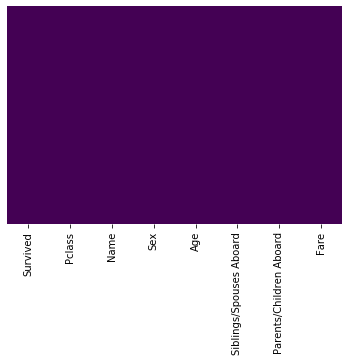

In [5]:
sb.heatmap(titanic. isnull ( ) , yticklabels=False, cbar=False, cmap= 'viridis' )

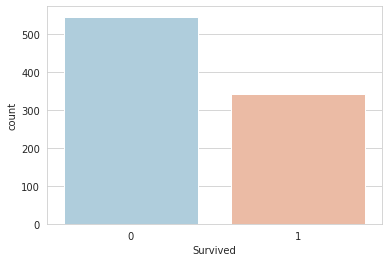

In [6]:
sb.set_style( 'whitegrid')
sb.countplot(x='Survived' , data=titanic, palette= 'RdBu_r' )

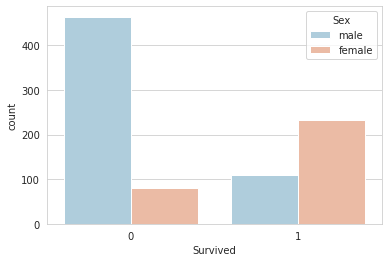

In [7]:
sb.set_style( 'whitegrid')
sb.countplot(x='Survived' , hue = 'Sex',data=titanic, palette= 'RdBu_r' )

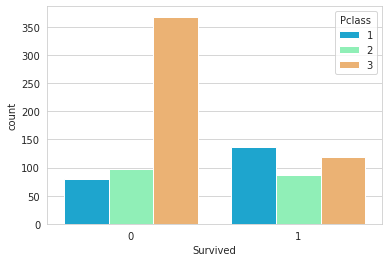

In [8]:
sb.set_style( 'whitegrid')
sb.countplot(x='Survived' , hue = 'Pclass', data=titanic, palette= 'rainbow' )

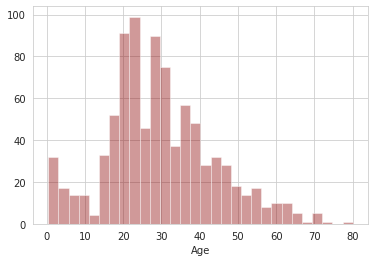

In [9]:
sb.distplot(titanic[ 'Age' ].dropna() , kde=False, color= 'darkred' , bins=30)


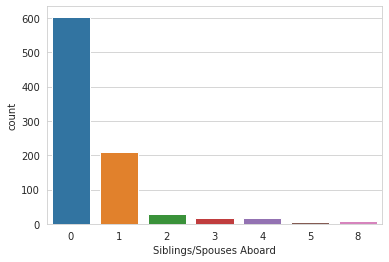

In [10]:
sb.countplot(x= 'Siblings/Spouses Aboard' , data=titanic)

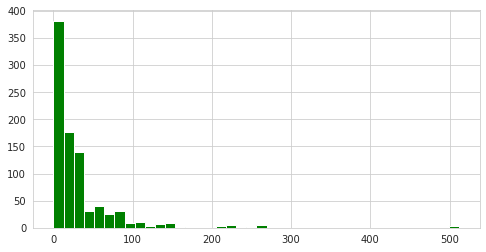

In [11]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by
filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the
average age by passenger class. For example:

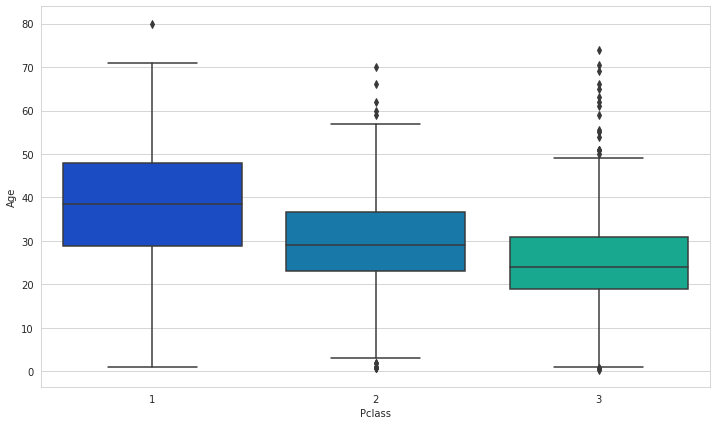

In [12]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

## We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use
these average age values to impute based on Pclass for Age.

In [0]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
                return 24
    else:
        return Age

In [0]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

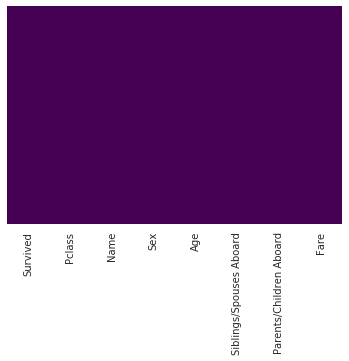

In [15]:
sb.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [16]:
titanic.drop('Cabin',axis=1,inplace=True)

KeyError: ignored

In [0]:
titanic.head()

In [0]:
titanic.dropna(inplace=True)

## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning
algorithm won't be able to directly take in those features as inputs.

In [0]:
titanic.info()

## Building a Logistic Regression model
Let's start by splitting our data into a training set and test set

*** Train Test Split ***

In [0]:
titanic = titanic.drop(['Name'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x = titanic.drop(['Survived'], axis=1)
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30,random_state=101)

## Training and Predicting

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
sex=pd.get_dummies(titanic["Sex"], drop_first=True)
sex.head(5)

titanic= pd.concat( [titanic, sex], axis=1 )

# for printing top 5 values

In [0]:
titanic.head()
#titanic.drop(['Sex'], inplace=True, axis=1)

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [0]:
predictions = logmodel.predict(X_test)
predictions

## Evaluation
We can check precision,recall,f1-score using classification

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,predictions))

# Pics

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Image data shape",digits.data.shape)
print("Label data shape",digits.target.shape)

In [0]:
plt.figure(figsize=(20,40))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training:%i\n"%label,fontsize=20)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state = 2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [0]:
logist = LogisticRegression()
logist.fit(x_train,y_train)

In [0]:
pred = logist.predict(x_test)

score = logist.score(x_test,y_test)
print(score)

In [0]:
plt.figure(figsize=(9,9))
cm = metrics.confusion_matrix(y_test,pred)
print(cm)
sb.heatmap(cm,annot=True,fmt = ".3f",linewidths=.5,square = True,cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size = 15)

In [0]:
index = 0
misclassifiedindex = []
for predict,actual in zip(pred,y_test):
    if predict == actual:
        misclassifiedindex.append(index)
        index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedindex[0:4]):
  plt.subplot(1,4,plotIndex +1)
  plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
  plt.title("Predictd: {}, Actual : {}".format(pred[wrong],y_test[wrong], fontsize=20))

# Logistic Regression Cost function and Gradient Decent

Convert .txt file to .csv file.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/university_admission.txt')
df.head(5)

In [0]:
df.to_csv('my_csv.csv')

Name the first column as Marks 1, second as Marks 2 and third column as admission. Consider 0 as not admitted and 1 as admitted

In [0]:
# very Important
# https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

df.columns = ['Marks_1', 'Marks_2' , 'admission']
df

In [0]:
# df.replace({'column_name':{ initail : Changed } })

df.replace({'admission':{ 0 : 'not admitted', 1 : 'admitted' } }, inplace=True)
df.head(5)

Plot scatter graph between exam 1 and exam 2. The marker should be x for not admitted and + for admitted.

In [0]:
mkr_dict = {'admitted': '+', 'not admitted': 'x'}

#for kind in mkr_dict:( plt.scatter(df['Marks 1'], df['Marks 2'],marker = mkr_dict[kind]))

plt.figure(figsize=(7,7))
ax = sb.scatterplot(x="Marks_1", y="Marks_2", data=df, style="admission", markers=mkr_dict)
plt.grid()
plt.show()

 Calculate Sigmoid Function

In [0]:
#Intro
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a


plt.plot( sigmoid(np.linspace(-10,10)) )
plt.figure()


In [0]:
#Calculate Sigmoid Function
import math

# Thethas
t0=0
t1=t2=0
dW = dB = 0.001
alpha = 0.000000000001

m1=df['Marks_1'].to_list()
m2=df['Marks_2'].to_list()
Adm=df['admission'].to_list()

sigg = []
for i in range(len(m1)):
    sig=1/(1+np.exp(-(t0+t1*m1[i]+t2*m1[i])))
    t1 = t1 - alpha * (dW / len(m1)) # Update the weights
    t2 = t2 - alpha * (dB / len(m1)) # Update the bias
    sigg.append(sig)

plt.plot(sigg)
print(sigg)
print('Sigmoid Function results in:',sig)


In [0]:
#Find the cost function and gradient decent
Q0=Q1=Q2=0

alpha=0.0001
l=len(m1)# l=100
lst=[] # cost function

for i in range(100):
    cost=0
    for j in range(l):
        sig=1/(1+np.exp(-(Q0+Q1*m1[j]+Q2*m2[j])))
        cost-=((1/l)*(Adm[j]*np.log(sig)+(1-Adm[j])*np.log(1-sig)))
    lst.append(cost)

    gd1=0
    for k in range(l):
        gd1+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-Adm[k])
    Q0-=alpha*(gd1/l)

    gd2=0
    for k in range(l):
        gd2+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-Adm[k])*m1[k]
    Q1-=alpha*(gd2/l)

    gd3=0
    for k in range(l):
        gd3+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-Adm[k])*m2[k]
    Q2-=alpha*(gd3/l)

plt.plot(range(100),lst)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')

In [0]:
print('The values of Q0,Q1,Q2 are:',Q0,Q1,'and',Q2,'respectively')


In [0]:
#Then Find the probability of getting admitted or not by user entry of marks.
y=[]
for i in range(len(m1)):
 h=1/(1+np.exp(-(Q0+Q1*m1[i]+Q2*m2[i])))
 y.append(h)
avg=sum(y)/len(y) #Getting the average
m1=float(input('Enter Marks 1:'))
m2=float(input('Enter Marks 2:'))
s=1/(1+np.exp(-(Q0+Q1*m1+Q2*m2)))
if s>avg:
 print('Admitted')
else:
 print('Not admitted')

# Suppose 30 instances(14 positives and 16 negatives) and 

attribute A divides the samples into sub-samples of 17 instances(4 negatives and 13 positives) and 13 instances(1 positives and 12 negatives)

In [0]:
import math

# Information Gain

ig1, ig2 = 0.0, 0.0
ig1 = -( (4/17)*math.log2(4/17) + (13/17)*math.log2(13/17) )
ig2 = -( (1/13)*math.log2(1/13) + (12/13)*math.log2(12/13) )

print("information gain is " + str(ig1+ ig2) )# + " and " + str(ig2) )

# Ginni index

gi, a, b = 0.0, 0.0, 0.0

a = 1 - ( (4/17)**2 + (13/17)**2 )
b = 1 - ( (1/13)**2 + (12/13)**2 )

gi = (17/30)*a + (13/30)*b
print("ginni index is " + str(gi) )


# KNN

In [17]:
#K-NN (K-Nearest Neighbour)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing DataSets
dataset = pd.read_csv('https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master//advertising.csv')
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,4].values


dataset = dataset.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
dataset.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Male                        1000 non-null int64
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [0]:
#Splitting Training and Test Set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
#Fitting knn Classification Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#Predicting the test set results
y_pred = classifier.predict(X_test)

In [0]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

ValueError: ignored

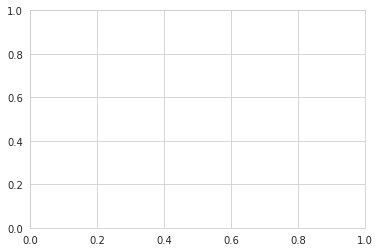

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('knn Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


ValueError: ignored

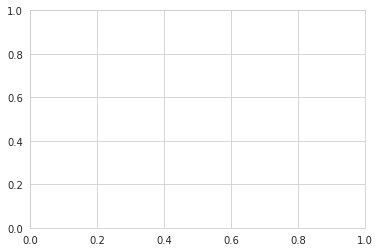

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('knn Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()